# Predicting Car Prices

## Introduction

In this project, we will predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We can read more about the data set <a href="https://archive.ics.uci.edu/ml/datasets/automobile">here</a> and can download it directly from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">here</a>.

In [1]:
import pandas as pd
import numpy as np

cars_cols = ["symboling", "normalized-losses", "make", "fuel-type", 
           "aspiration", "num-of-doors", "body-style", "drive-wheels",
          "engine-location", "wheel-base", "length", "width", "height",
          "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
          "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
          "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars = pd.read_csv('imports-85.data', header=None, names=cars_cols)


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


There are no headers in the dataset. So, it is added while readin the dataset. The target column for prediction is ```price``` column. The columns that could be considered as features are the columns which provide numerical information. But, in order to determine the columns, we have to perform data cleaning. 

## Data Cleaning

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the ```normalized-losses``` column contains missing values represented using ```"?"```. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from ```0``` to ```1```.

In [4]:
# Data cleaning replace ? to nan
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
numeric_cars.replace('?', np.nan, inplace=True)

In [5]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


In [7]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

We have identified the numeric values and cleaned the dataset containing those values and rescaled the numeric columns from their original range to range from ```0``` to ```1```.

## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [11]:
# Function to return RMSE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(features, target, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize the order of data for splitting
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    # Splitting data into test and training set
    last_index = int(len(random_df) / 2)
    train_df = random_df[: last_index]
    test_df = random_df[last_index:]
    
    # Fitting the features with the model
    knn.fit(train_df[features], train_df[target])
    
    # Performing prediction
    predicted_price = knn.predict(test_df[features])
    
    # Calculate MSE and RMSE
    mse = mean_squared_error(test_df[target], predicted_price)
    rmse = mse ** (1/2)
    
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column, train the dataset and predict values

for col in train_cols:
    rmse_results[col] = knn_train_test([col], 'price', numeric_cars)

rmse_results

{'bore': 6780.627784685976,
 'city-mpg': 4766.422505090134,
 'compression-ratio': 6610.812153159129,
 'curb-weight': 4401.118254793124,
 'height': 8144.441042663747,
 'highway-mpg': 4630.026798588056,
 'horsepower': 4037.0377131537603,
 'length': 5427.2009608367125,
 'normalized-losses': 7330.197653434445,
 'peak-rpm': 7697.4596964334805,
 'stroke': 8006.529544647101,
 'wheel-base': 5461.553997873057,
 'width': 4704.482589704386}

From the univariate model, the variance in price value depends more on the ```horsepower``` then any other columns. But, this may create bias. So, we need the look into multivariate models to predict better prices.

In [12]:
# Function to take into account the k value
def knn_train_test(features, target, df, k):
    
    np.random.seed(1)
    
    # Randomize the order of data for splitting
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    
    # Splitting data into test and training set
    last_index = int(len(random_df) / 2)
    train_df = random_df[: last_index]
    test_df = random_df[last_index:]
    rmses = {}
    for val in k:
        knn = KNeighborsRegressor(n_neighbors=val)
        # Fitting the features with the model
        knn.fit(train_df[features], train_df[target])

        # Performing prediction
        predicted_price = knn.predict(test_df[features])

        # Calculate MSE and RMSE
        mse = mean_squared_error(test_df[target], predicted_price)
        rmse = mse ** (1/2)
        rmses[val] = rmse
        
    return rmses

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
k = [1,3,5,7,9]
# For each column, train the dataset and predict values

for col in train_cols:
    rmse_results[col] = knn_train_test([col], 'price', numeric_cars, k)

rmse_results


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

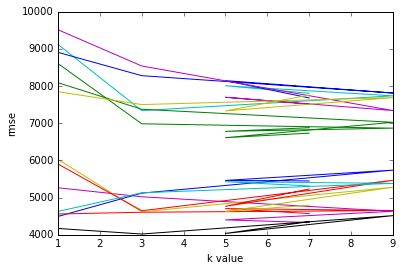

In [13]:
# Visualizing result using line plot
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in rmse_results.items():
    x_vals = list(value.keys())
    y_vals = list(value.values())
    
    plt.plot(x_vals, y_vals)
    plt.xlabel("k value")
    plt.ylabel("rmse")

## Multivariate Model

Let's modify the ```knn_train_test()``` function we wrote in the last step to work with multiple columns.

In [14]:
# Sorting the columns based on the RMSE values obtained previously

sorted_columns = {}

for k, v in rmse_results.items():
    rmse_values = list(v.values())
    avg_value = sum(rmse_values) / len(rmse_values)
    sorted_columns[k] = avg_value

sorted_columns = sorted(sorted_columns, key=sorted_columns.get)
sorted_columns

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-ratio',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

In [15]:
rmse_results = {}
k = [5]
# For each column, train the dataset and predict values

for i in range(2, 6):
    rmse_results['best {} columns'.format(i)] = knn_train_test(sorted_columns[:i], 'price', numeric_cars, k)

rmse_results

{'best 2 columns': {5: 3589.3132622073304},
 'best 3 columns': {5: 3305.9401397969677},
 'best 4 columns': {5: 3358.6915801682458},
 'best 5 columns': {5: 3665.546673045813}}

We have determined the RMSE values for multiple columns as shown here.

## Hyperparameter tuning

Let's now optimize the model that performed the best in the previous step.

In [16]:
rmse_results = {}
k = range(1, 26)
# For each column, train the dataset and predict values

for i in range(2, 6):
    rmse_results['best {} columns'.format(i)] = knn_train_test(sorted_columns[:i], 'price', numeric_cars, k)

rmse_results

{'best 2 columns': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 'best 3 columns': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,


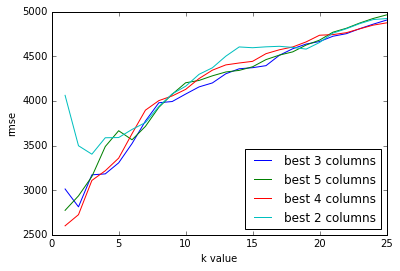

In [17]:
# Visulaize the RMSE value for finding optimal k value

for k, v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y, label=k)
    plt.xlabel("k value")
    plt.ylabel("rmse")
    plt.legend(loc="lower right")

From the plot, it can be infered that the model does better predictions for the value of ```k``` as ```1``` when considering best 4 and 5 columns, ```2``` for best 3 columns and ```3``` for best 2 columns. As the k value increases further, the value of Root mean squared error also increases, thereby increasing the variance. It can also be seen that the k value is the least when considering the columns ```horsepower```, ```width```, ```curb-weight``` and ```highway-mpg``` as features (i.e. best 4 columns) for predicting the car prices. Thus, we can predict the price of the car with more accuracy when considering these 4 features with k as ```1```.